## Display the map files and output to png files

In [1]:
import os
from PIL import Image # Install the pillow module for PIL
from pycoalescence import Map
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
# Define the input map folder and files
map_folder = "maps"
fine_present_file = "fine_present"
fine_historical_file = "fine_historical"
coarse_present_file = "coarse_present"
coarse_historical_file = "coarse_historical"
# Define output location
output_folder = "figures"
# Output colour for the habitat
rgb1 = (0, 127, 16)
# Output colour for the non-habitat
rgb2 = (236, 236, 236)

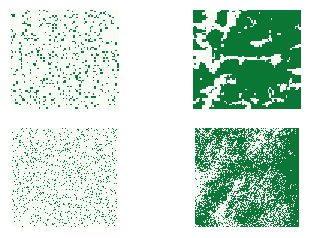

In [3]:
%matplotlib inline
fig, axs = plt.subplots(ncols=2, nrows=2)
for i, file in enumerate([fine_present_file, coarse_present_file, fine_historical_file, coarse_historical_file]):
    file_path = os.path.join(map_folder, "{}.tif".format(file))
    m = Map(file_path)
    m.open()
    sb.heatmap(m.data, ax=axs[i%2][int(i/2)], cmap="Greens",
               cbar=False, xticklabels=False, yticklabels=False, square=True, vmax=1.2)
    col_array = np.zeros((m.data.shape[0], m.data.shape[1], 3), 'uint8')
    col_array[..., 0] = (m.data)*rgb1[0] + (1-m.data)*rgb2[0]
    # np.full((m.data.shape[0], m.data.shape[1]),
    #                             dtype='uint8', fill_value=rgb1[0]) #-(rgb1[0]-m.data*rgb2[0])
    col_array[..., 1] = (m.data)*rgb1[1] + (1-m.data)*rgb2[1]
    col_array[..., 2] = (m.data)*rgb1[2] + (1-m.data)*rgb2[2]
    im = Image.fromarray(col_array)
    im.save(os.path.join(output_folder, "{}.png".format(file)))
plt.show()